# Assign records to your team

This tutorial is part of a series in which we will get to know the `FeedbackDataset`. In this step, we will show the complete workflow to assign the records of our TextClassification dataset to a team.  You can have a look at the previous tutorials for [creating the dataset](./create-dataset-001.ipynb) and [configuring the users and workspaces](./configure-users-and-workspaces-000.ipynb). Feel free to check out the [practical guides](../../../../practical_guides/practical_guides.md) page for more in-depth information.

![workflow](../../../../_static/tutorials/end2end/base/workflow_assign_records.svg)

## Table of contents

1. [Load a FeedbackDataset](#Pull-the-Dataset)
   1. [From Argilla](#From-Argilla) 
   2. [From the HuggingFace Hub](#From-HuggingFace-Hub)
2. [Full Overlap](#Full-Overlap)
3. [Controlled Overlap](#Controlled-Overlap)
   1. [Working with Groups](#Working-with-Groups)
   2. [Working with a List of Users](#Working-with-a-List-of-Users)
4. [Conclusion](#Conclusion)

## Running Argilla

For this tutorial, you will need to have an Argilla server running. There are two main options for deploying and running Argilla:

**Deploy Argilla on Hugging Face Spaces:** If you want to run tutorials with external notebooks (e.g., Google Colab) and you have an account on Hugging Face, you can deploy Argilla on Spaces with a few clicks:

[![deploy on spaces](https://huggingface.co/datasets/huggingface/badges/raw/main/deploy-to-spaces-lg.svg)](https://huggingface.co/new-space?template=argilla/argilla-template-space)

For details about configuring your deployment, check the [official Hugging Face Hub guide](https://huggingface.co/docs/hub/spaces-sdks-docker-argilla).

**Launch Argilla using Argilla's quickstart Docker image**: This is the recommended option if you want [Argilla running on your local machine](../../../../getting_started/quickstart.md). Note that this option will only let you run the tutorial locally and not with an external notebook service.

For more information on deployment options, please check the Deployment section of the documentation.

<div class="alert alert-info">

Tip

This tutorial is a Jupyter Notebook. There are two options to run it:

- Use the Open in Colab button at the top of this page. This option allows you to run the notebook directly on Google Colab. Don't forget to change the runtime type to GPU for faster model training and inference.
- Download the .ipynb file by clicking on the View source link at the top of the page. This option allows you to download the notebook and run it on your local machine or on a Jupyter notebook tool of your choice.
</div>

First, let's install our dependencies and import the necessary libraries:

In [ ]:
!pip install "argilla-python"
!pip install datasets

In [1]:
import argilla_sdk as rg

In order to run this notebook we will need some credentials to push and load datasets from `Argilla` and `🤗 Hub`, let's set them in the following cell:

Log in to argilla:

In [ ]:
rg.init()

## Pull the Dataset

As we uploaded the dataset we created in the [previous tutorial](./create-dataset-001.ipynb) to both Argilla and HuggingFace Hub, we can pull the dataset from either of them. Let us see how we can pull the dataset from both.

### From Argilla

We can pull the dataset from Argilla by using the `get` method. 

In [67]:
dataset = rg.Dataset.get(name="end2end_textclassification", workspace="argilla")

If the dataset does not 

In [ ]:
dataset[0].fields

{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."}

## Full Overlap

Feedback dataset supports multiple annotation for each record, allowing for straightforward aggregation and utilization. Simply ensure that your dataset is available in a shared workspace accessible to all team members. For detailed guidance on setting this up, refer to our comprehensive example on [configuring users and workspaces](./configure-users-and-workspaces-000.ipynb).

## Controlled Overlap

If you aim to specify a fixed number of annotations per record, it's advisable to implement a controlled overlap. To facilitate this, we offer a variety of options and workflows tailored to meet your needs.

### Working with Groups

This section will focus on describing all the steps to assign records to predefined groups of annotators.

#### 1. Get the users and records

First, we will set our groups and the records. In this example, we'll be considering a scenario where we are collaborating with two teams, each consisting of five members and a thousand records that need to be annotated. This will be the first time we work with this teams, so we will only be providing their names.

> Note: The names of your members should be written in lower case.

In [68]:
# Get all the users in the workspace
workspace_users = rg.Workspace.get(name="argilla").users

# Split the users in to two groups
users_group_1 = workspace_users[:len(workspace_users)//2]
users_group_2 = workspace_users[len(workspace_users)//2:]

1.1. Define groups from new users

In [ ]:
users_group_1 = [
    rg.User(username="tania", password="taniascat"),
    rg.User(username="bill", password="billsdog"),
    rg.User(username="armita", password="amitasbird"),
]

users_group_2 = [
    rg.User(username="tim", password="taniascat"),
    rg.User(username="james", password="jamesfish"),
    rg.User(username="rashisas", password="rashisaslizard"),
]

1.2 Define groups existing users

In [ ]:
users_group_1 = [
    rg.User.get(username="tania"),
    rg.User.get(username="bill"),
    rg.User.get(username="armita"),
]

users_group_2 = [
    rg.User(username="tim", password="taniascat"),
    rg.User(username="james", password="jamesfish"),
    rg.User.get(username="rashida"),
]

#### 2. Assign the records

We will use the `assign_records` function to assign the annotations. We will specify the following parameters:

 - `users`: This will be our dictionary with the groups.
 - `records`: The list of 1000 records.
 - `overlap`: We will set the overlap value to 1 (also known as zero overlap), indicating that the teams will annotate the samples independently, without any overlap. Since each group comprises five members, ultimately, each record will receive 5 annotations, as all members from the same team will be annotating the same records.
 - `shuffle`: To avoid any kind of bias, we will set it to `True`, so the samples are shuffled before the assignment.

As we already mention, we have not yet worked with these annotators, so their users in Argilla will be automatically created.

 > Note: The username and first name will be the names provided, the default password is "12345678" and they will have the role of "annotator".

In [ ]:
assignments = dataset.assign(
    groups = [users_group_1, users_group_2],
    overlap = 1,
    shuffle = True
)

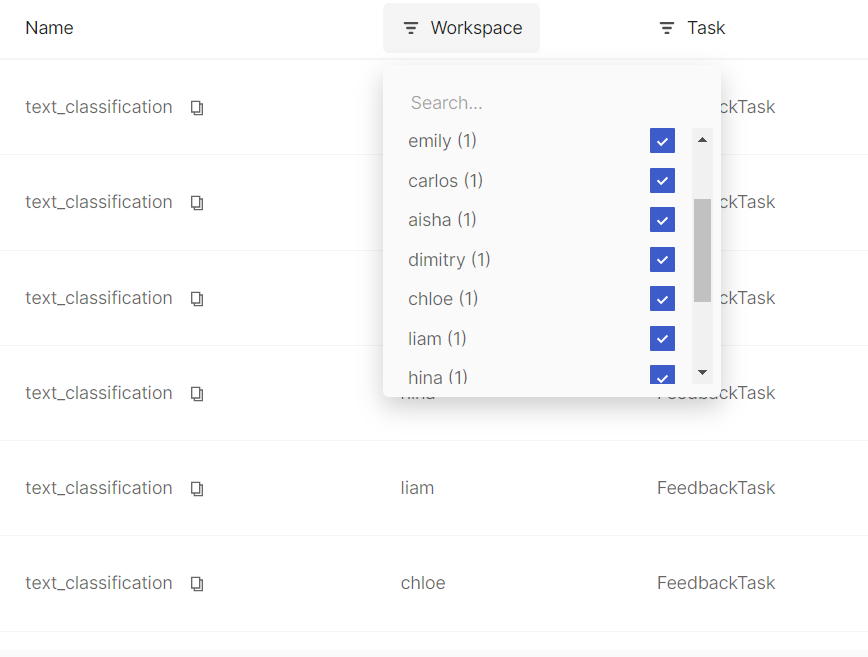

## Conclusion

To sum up, we have shown how to assign records with full and controlled overlap. In scenarios involving controlled overlap, we explored the methods for distributing records among groups of annotators and a specified list of users through the use of `assign_records` and `assign_workspaces`. Additionally, we examined the technique for transferring these allocated records to their respective workspaces. In the [next tutorial](./add-metadata-003.ipynb), we will see how we can add metadata properties to our dataset.